In [6]:
from imutils import paths
import face_recognition
import pickle
import cv2
import os
import numpy as np
import pandas as pd
import csv
import time
%pylab inline
import matplotlib.pyplot as plt
import numpy as np

Populating the interactive namespace from numpy and matplotlib


 Same Person



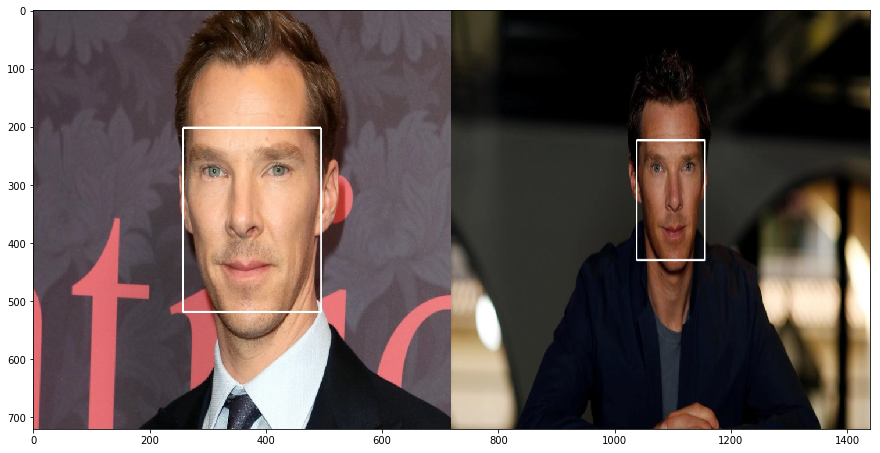

In [8]:
args = {'image1': '/home/jugal/Desktop/Face Recognition/test/image1.jpg',
        'image2': '/home/jugal/Desktop/Face Recognition/test/image2.jpg',
        'detection_method': 'hog'}


name = 'NONE'

image1 = cv2.imread(args["image1"])
image2 = cv2.imread(args["image2"])

rgb1 = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)
rgb2 = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)

# Detect the (x, y)-coordinates of the bounding boxes corresponding to each face in the input image
boxes1 = face_recognition.face_locations(rgb1, model=args["detection_method"])
boxes2 = face_recognition.face_locations(rgb2, model=args["detection_method"])

# Computing the facial embedding for the face
encodings1 = face_recognition.face_encodings(rgb1, boxes1)
encodings2 = face_recognition.face_encodings(rgb2, boxes2)

matches = face_recognition.compare_faces(np.array(encodings1), np.array(encodings2), tolerance = 0.3)

if matches == [True]:
    print(" Same Person")
else:
    print(" Different person")
    


for ((top, right, bottom, left), name) in zip(boxes1,name):
    image1 = cv2.rectangle(image1, (left, top), (right, bottom), (255, 255, 255), 2)


for ((top, right, bottom, left), name) in zip(boxes2, name):
    image2 = cv2.rectangle(image2, (left, top), (right, bottom), (255, 255, 255), 2)






a = cv2.resize(image1,(720,720))
b = cv2.resize(image2,(720,720))
print()
distance = np.sum((np.array(encodings1) - np.array(encodings2))**2)
#print(" [REASON] : Euclidian Distance between the 2 images :",distance)



concat_a_b = np.concatenate((a, b), axis=1)
plt.figure(figsize=(15,15))
img = concat_a_b
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
imgplot = plt.imshow(img)
plt.show()